<a href="https://colab.research.google.com/github/GuillaumeArp/Wild_Notebooks/blob/main/Decision_Trees_Guillaume_Arp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees
Within this challenge, we're going to use decision trees in both a classification sense and a regression sense and visualize each of these representations. In this challenge, we will be using the `mpg` dataset.

## Regression Trees

In [ ]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt
import plotly.express as px

data = sns.load_dataset("mpg")

# Drop the rows with missing values
# Drop the "name" column
# Transform the "origin" column to represent the following:
#   USA = 0, Japan = 1, Europe = 2

# INSERT CODE HERE
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [ ]:
data.drop('name', axis=1, inplace=True)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


In [ ]:
data['origin'] = data['origin'].factorize()[0]
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0
3,16.0,8,304.0,150.0,3433,12.0,70,0
4,17.0,8,302.0,140.0,3449,10.5,70,0
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,0
396,28.0,4,120.0,79.0,2625,18.6,82,0


In [ ]:
# Split into train and test splits using the "mpg" column as target, random state of 42 and a test size of 20%
# INSERT CODE HERE

cols = data.columns[1:]

X = data[cols]
y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)

In [ ]:
# Fit a decision tree
# INSERT CODE HERE

modelDTR = tree.DecisionTreeRegressor()
modelDTR.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# Predict on the xtest set
# INSERT CODE HERE

test_df = X_test.copy()

test_df['mpg_predicted'] = modelDTR.predict(test_df[cols])
test_df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg_predicted
79,4,96.0,69.0,2189,18.0,72,2,25.0
276,4,121.0,115.0,2795,15.7,78,2,20.3
248,4,91.0,60.0,1800,16.4,78,1,39.0
56,4,91.0,70.0,1955,20.5,71,0,33.0
393,4,140.0,86.0,2790,15.6,82,0,27.0
...,...,...,...,...,...,...,...,...
366,6,225.0,85.0,3465,16.6,81,0,20.2
83,4,98.0,80.0,2164,15.0,72,0,24.0
115,8,350.0,145.0,4082,13.0,73,0,13.0
3,8,304.0,150.0,3433,12.0,70,0,18.0


In [ ]:
# Print out the R2 score.
# INSERT CODE HERE

print(f"Accuracy score on the train dataset: {modelDTR.score(X_train, y_train)}")
print(f"Accuracy score on the test dataset: {modelDTR.score(X_test, y_test)}")

Accuracy score on the train dataset: 1.0
Accuracy score on the test dataset: 0.7792697140881011


In [ ]:
# Print each feature with importance %
# INSERT CODE HERE

X_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin'],
      dtype='object')

In [ ]:
modelDTR.feature_importances_

array([0.00406745, 0.62821259, 0.17318755, 0.06406352, 0.02351892,
       0.10422264, 0.00272732])

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:1233: FutureWarning:

the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.



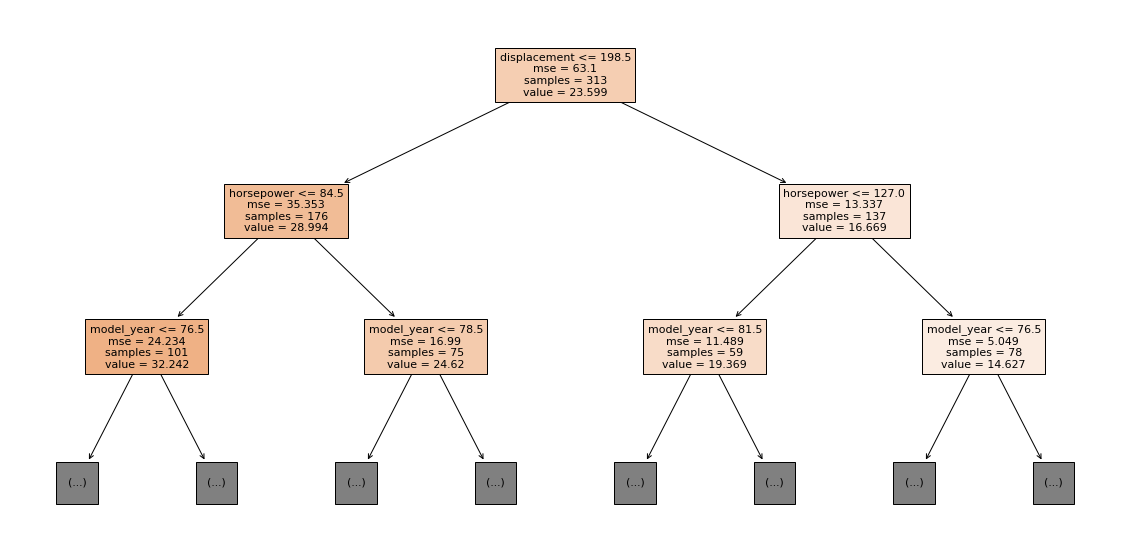

In [ ]:
# Plot the results
# Use column names as feature names and a max_depth of only 2
# INSERT CODE HERE

plt.figure(figsize=(20, 10))
tree.plot_tree(
    modelDTR,
    filled=True,
    class_names=modelDTR.classes_,
    feature_names=X_train.columns,
    max_depth=2
)

plt.show()

## Classification Trees

In [ ]:
# Load in the Penguins dataset
data_pen = sns.load_dataset('penguins')

# Drop rows with missing values
# Turn the species column into numeric
# Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2

# Turn the island column into numeric
# Specifically, Torgersen = 0, Biscoe = 1, Dream = 2

# INSERT CODE HERE
data_pen

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
data_pen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
data_pen.dropna(inplace=True)

In [ ]:
data_pen['species'] = data_pen['species'].factorize()[0]
data_pen

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,0,Torgersen,39.5,17.4,186.0,3800.0,Female
2,0,Torgersen,40.3,18.0,195.0,3250.0,Female
4,0,Torgersen,36.7,19.3,193.0,3450.0,Female
5,0,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,2,Biscoe,47.2,13.7,214.0,4925.0,Female
340,2,Biscoe,46.8,14.3,215.0,4850.0,Female
341,2,Biscoe,50.4,15.7,222.0,5750.0,Male
342,2,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
data_pen['island'] = data_pen['island'].factorize()[0]
data_pen

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,Male
1,0,0,39.5,17.4,186.0,3800.0,Female
2,0,0,40.3,18.0,195.0,3250.0,Female
4,0,0,36.7,19.3,193.0,3450.0,Female
5,0,0,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,2,1,47.2,13.7,214.0,4925.0,Female
340,2,1,46.8,14.3,215.0,4850.0,Female
341,2,1,50.4,15.7,222.0,5750.0,Male
342,2,1,45.2,14.8,212.0,5200.0,Female


In [ ]:
# Using a random state of 42 and a test size of 0.20, as well as "sex" as the output, split in training and testing sets
# INSERT CODE HERE

cols = data_pen.columns[:-1]

X = data_pen[cols]
y = data_pen['sex'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)


In [ ]:
# Using a random state of 42, fit the classification tree.
# INSERT CODE HERE

modelDTC = tree.DecisionTreeClassifier()
modelDTC.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Print the predictions on the test set
# INSERT CODE HERE

test_df_pen = X_test.copy()

test_df_pen['sex_predicted'] = modelDTC.predict(test_df_pen[cols])
test_df_pen

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_predicted
30,0,2,39.5,16.7,178.0,3250.0,Female
317,2,1,46.9,14.6,222.0,4875.0,Female
79,0,0,42.1,19.1,195.0,4000.0,Male
201,1,2,49.8,17.3,198.0,3675.0,Female
63,0,1,41.1,18.2,192.0,4050.0,Male
...,...,...,...,...,...,...,...
288,2,1,43.5,14.2,220.0,4700.0,Female
4,0,0,36.7,19.3,193.0,3450.0,Female
83,0,0,35.1,19.4,193.0,4200.0,Female
319,2,1,51.1,16.5,225.0,5250.0,Male


In [ ]:
# Print the accuracy score for the predictions
# INSERT CODE HERE

print(f"Accuracy score on the train dataset: {modelDTC.score(X_train, y_train)}")
print(f"Accuracy score on the test dataset: {modelDTC.score(X_test, y_test)}")

Accuracy score on the train dataset: 1.0
Accuracy score on the test dataset: 0.8507462686567164


In [ ]:
# Print each feature with importance %
# INSERT CODE HERE

X_train.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g'],
      dtype='object')

In [ ]:
modelDTR.feature_importances_

array([0.00406745, 0.62821259, 0.17318755, 0.06406352, 0.02351892,
       0.10422264, 0.00272732])

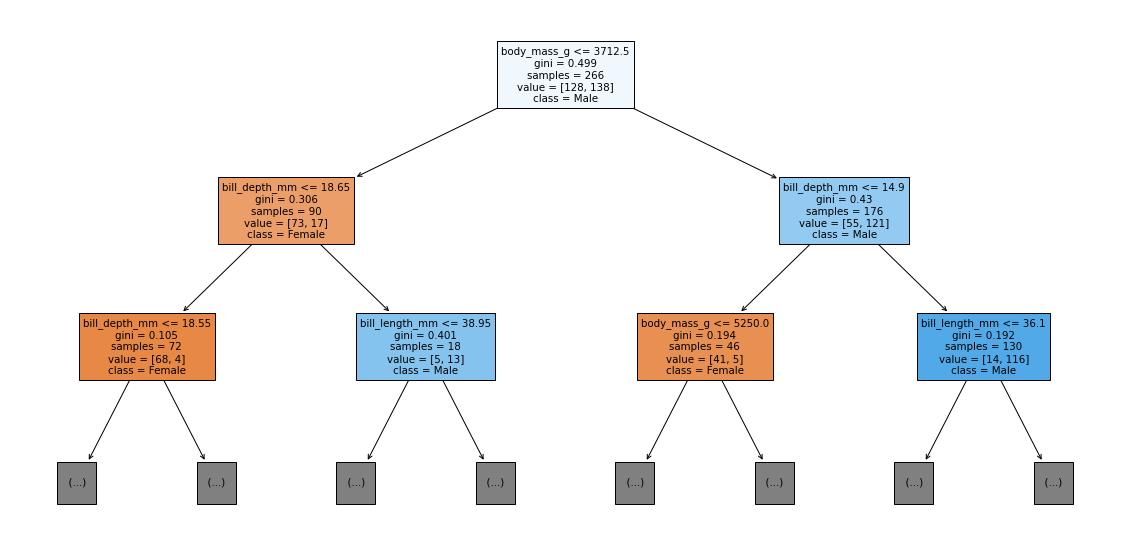

In [ ]:
# Plot the results
# Use column names as feature names and a max_depth of only 2
# INSERT CODE HERE

plt.figure(figsize=(20, 10))
tree.plot_tree(
    modelDTC,
    filled=True,
    class_names=modelDTC.classes_,
    feature_names=X_train.columns,
    max_depth=2
)

plt.show()

# Effects of Changing the Maximum Depth
In this section, we're going to see how changing the max_depth, which is one of the most important hyperparameters when it comes to decision trees, plays a part in the prediction accuracy.

*** This exercise is only done for you to see how big of an impact choosing the correct max_depth is!*** Choosing the correct max_depth (or any other hyperparameter for that matter) is typically done using cross validation or a more advanced technique (Grid Search, Random Search, Bayesian Optimization).


Using the above dataset, fit and predict the train and test sets using a max_depth from 1 to 10. For example, within the first iteration, you would fit the xtrain and ytrain datasets using max_depth=1, predict the xtest using this model, and then record the accuracy. On the next iteration, the max_depth would then be 2, etc.

In [ ]:
# Using a random state of 42, fit multiple decision trees with various max depths.
# Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))
list_of_accuracies = []
for i in range(1, 11):
  # INSERT CODE HERE
  modelDTC = tree.DecisionTreeClassifier(max_depth=i)
  modelDTC.fit(X_train, y_train)
  list_of_accuracies.append(modelDTC.score(X_test, y_test))

list_of_accuracies


[0.7014925373134329,
 0.8208955223880597,
 0.835820895522388,
 0.8507462686567164,
 0.835820895522388,
 0.835820895522388,
 0.8656716417910447,
 0.8656716417910447,
 0.8507462686567164,
 0.8656716417910447]

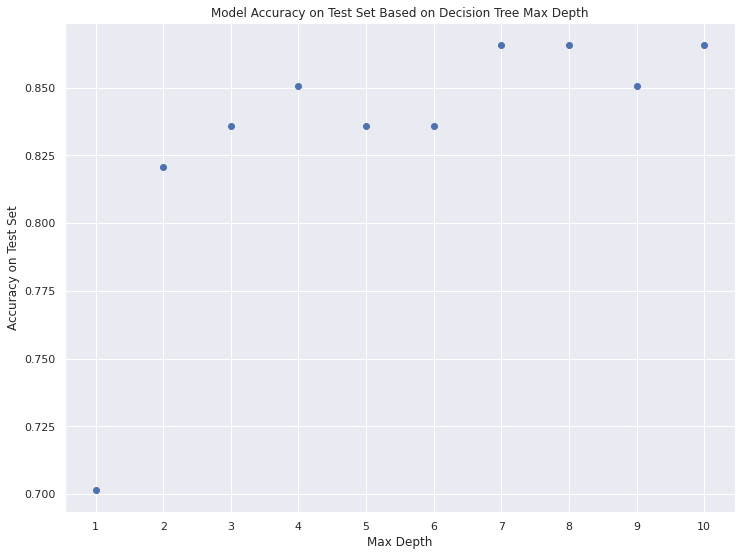

In [ ]:
# Plot these accuracies using matplotlib with the accuracies on the y-axis and the max_depth on the x-axis.
# INSERT CODE HERE
sns.set_theme()
plt.figure(figsize=(12,9))

plt.scatter(x=range(1, 11), y=list_of_accuracies)
plt.xticks(ticks=range(1,11))
plt.xlabel('Max Depth')
plt.ylabel('Accuracy on Test Set')
plt.title('Model Accuracy on Test Set Based on Decision Tree Max Depth')

plt.show()


In [ ]:
# Let's make this interactive for better readability, and also prettier

fig = px.scatter(
    x=range(1, 11),
    y=list_of_accuracies,
    labels={'x': 'Max Depth', 'y': 'Accuracy on Test Set'},
    title='Model Accuracy on Test Set Based on Decision Tree Max Depth'
)

fig.update_layout(width=745,
                  height=558,
                  template='plotly_dark',
                  xaxis = dict(tickmode='linear', tick0=1, dtick=1),
                  title_x=0.5
                  )
fig.show()